In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels
import os
from scipy.stats import norm

#import mpl_finance as mpl

In [2]:
current_dir=os.getcwd()
data_dir=current_dir+'\Data\\'
files=os.listdir(data_dir)
files

['hackathon_data.csv', 'milkbasket_hackathon_sample_data.csv']

In [3]:
MB=pd.read_csv("D:\Projects\Bootstrap_paradox\Hackathon\hackathon_data.csv")

In [4]:
MB.head(3)


,customer_id,manufacturer_id,society_id,city_id,route_id,store_id,order_id,order_date,category_id,subcategory_id,product_id,product_quantity,selling_price_per_unit,total_cost,subscription,product_addedtobasket_on
0,2698080,1122016,1127168,1120112,1121456,1120112,338048928,2018-05-01,1122576,1125264,1120336,4,16.01,64.04,0,2018-04-30 16:23:46
1,1134224,1134336,1120224,1120112,1120336,1120112,337533168,2018-05-01,1122576,1125152,1939280,1,8.79,8.79,1,2018-04-19 01:30:02
2,3686704,1150128,1126160,1120112,1123472,1120112,338235520,2018-05-01,1123472,1130640,1681456,1,25.00,25.00,0,2018-04-30 22:26:07


In [4]:
print('Rows x columns' ,MB.shape)

Rows x columns (9678979, 16)


In [5]:
print('First Order On',min(MB.order_date))
print('Last Order On',max(MB.order_date))

First Order On 2018-05-01
Last Order On 2019-07-31


In [6]:
print('Minimum item value',min(MB.selling_price_per_unit))
print('Maximum item value',max(MB.selling_price_per_unit))

Minimum item value 0.0
Maximum item value 3999.38


In [7]:
print('Number of Active Subscriptions: ',sum(MB.subscription))

Number of Active Subscriptions:  2279480


In [4]:
UsersAll=MB.customer_id
Users=UsersAll.unique()
print('No of Unique Users:', Users.shape)

No of Unique Users: (30000,)


In [9]:
freebies = MB[MB.selling_price_per_unit == 0.0]

# Feature Engineering

## Customer Segmentation

In [10]:

UserValueList=[]
for c in range(0, len(Users)):    
#for c in range(0, 1000):    
    User = MB[MB.customer_id == Users[c]]
    orders=len(User.order_id.unique())
    value=sum(User.total_cost)
    items=sum(User.product_quantity)
    data=[Users[c],value,items,orders]
    #print(data)
    UserValueList.append(data)


KeyboardInterrupt: 

In [12]:
df = pd.DataFrame(UserValueList, columns = ['CustID', 'Total_Value','Total_items','Total_Orders']) 

In [13]:
t=df.Total_Value
print('Maximum Customer Value:', max(t))
print('Minimum Customer Value:', min(t))

Maximum Customer Value: 121208.23999999979
Minimum Customer Value: 2457.4500000000116


In [14]:
print(t.describe())

count     30000.000000
mean      15192.411563
std        7178.063484
min        2457.450000
25%       10106.724730
50%       13706.083100
75%       18562.417818
max      121208.240000
Name: Total_Value, dtype: float64


Text(0,0.5,'Total_Items')

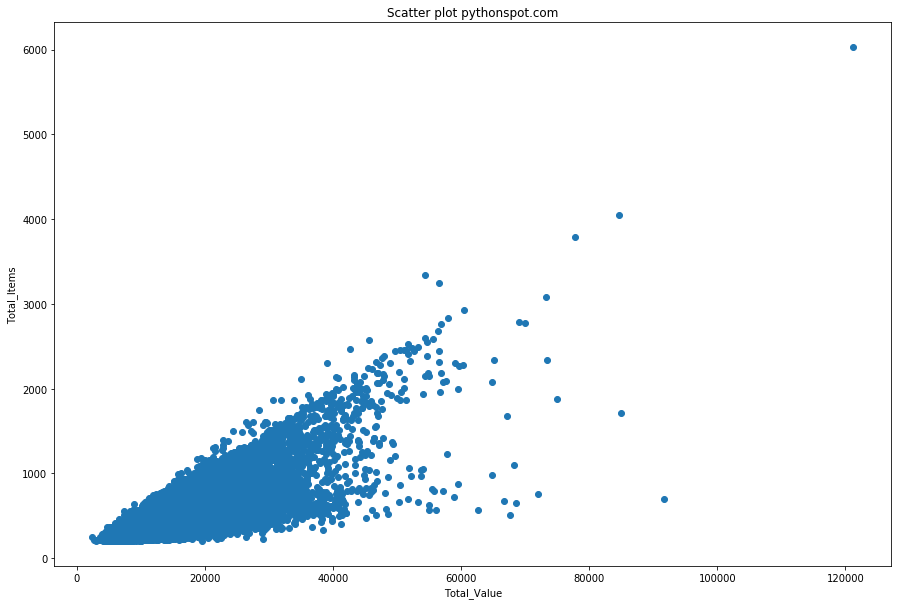

In [15]:
x=df.Total_Value
y=df.Total_items
plt.figure(figsize=(15,10))
plt.scatter(x, y)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('Total_Value')
plt.ylabel('Total_Items')

Text(0,0.5,'Total_Orders')

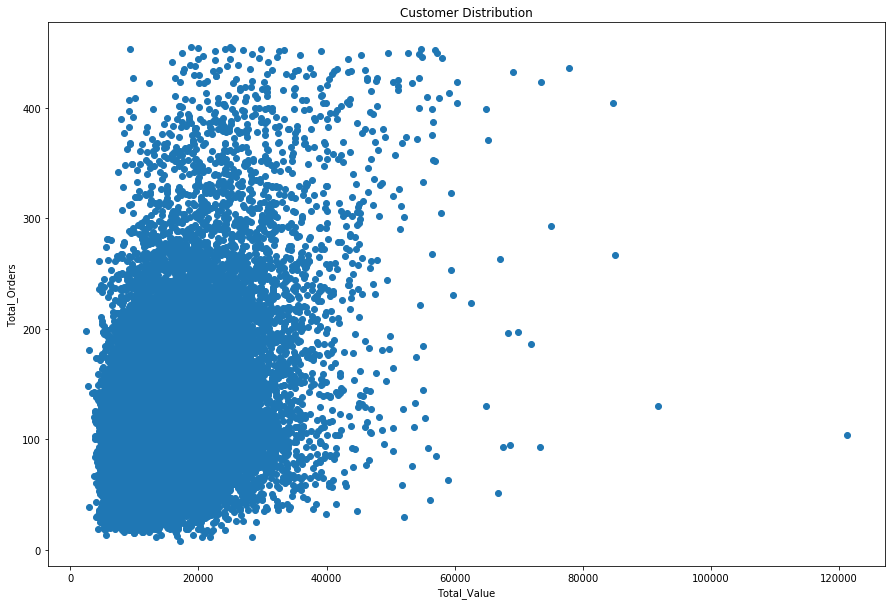

In [16]:

x=df.Total_Value
y=df.Total_Orders
plt.figure(figsize=(15,10))
plt.scatter(x, y)
plt.title('Customer Distribution')
plt.xlabel('Total_Value')
plt.ylabel('Total_Orders')

In [5]:
import datetime
def FindDays(DStart,DEnd):    
    t0=DStart.split('-')
#    print(t0)
    #t=ip_string
    dend=[0,0,0]
    for i in range(0, len(t0)):
        dend[i]=int(t0[i].split(' ')[0])    
    dt_dend=datetime.datetime(dend[0],dend[1],dend[2])
    
    t1=DEnd.split('-')
#    print(t1)
    #t=ip_string
    dstart=[0,0,0]
    for i in range(0, len(t1)):
        dstart[i]=int(t1[i].split(' ')[0])    
    dt_start=datetime.datetime(dend[0],dend[1],dend[2])
    dt_dstart=datetime.datetime(dstart[0],dstart[1],dstart[2])
    
    c=dt_dend-dt_dstart
    Days=(c.total_seconds())/(3600*24)
    
    return Days

In [ ]:
UserValueList=[]
Orders=[]
for c in range(0, len(Users)):    
#for c in range(0, 10):    
    User = MB[MB.customer_id == Users[c]]
    order_ids=User.order_id.unique()
    orders=len(order_ids)
    dt_tm=User.product_addedtobasket_on.unique()
    no_of_days=FindDays(max(dt_tm),min(dt_tm))
    soc=User.society_id.unique()
    #print("User ID: ",Users[c])
    #print("No of Orders: ",orders)
    #print()
    for i in range(0,orders):
        o=order_ids[i]
        #print("Order number :",o)
        transaction=User[User.order_id == o]
        #print("Number of Transactions are \n",len(transaction.total_cost))
        #print("Transactions are: ",(transaction.total_cost))
        cost = sum(transaction.total_cost)
        #print("Total cost is :",(cost))        
        #print()
        Orders.append(cost)
        #value=sum
    
    cost=0
    
    #print("UID, no_of_orders, mean_order_value, std_deviation, max_order, min,order, total_order_value")
    meta_data=[Users[c],soc[0],no_of_days,len(Orders),np.mean(Orders),np.std(Orders),max(Orders),min(Orders),sum(Orders)]
    #print(meta_data)
    #value=sum(User.total_cost)
    #items=sum(User.product_quantity)
    #data=[Users[c],value,items,orders]
    #print(data)
    Orders=[]
    UserValueList.append(meta_data)

In [31]:
df = pd.DataFrame(UserValueList, columns = ['UID', 'Society_ID','Active_days','no_of_orders', 'mean_order_value', 'std_deviation', 'max_order', 'min_order', 'total_order_value']) 
# df.head()
df

,UID,Society_ID,Active_days,no_of_orders,mean_order_value,std_deviation,max_order,min_order,total_order_value
0,2698080,1127168,122.0,61,125.405082,132.032471,937.06,20.00,7649.7100
1,1134224,1120224,123.0,119,73.525294,20.138612,171.78,8.79,8749.5100
2,3686704,1126160,454.0,89,184.497708,267.190113,1576.02,0.00,16420.2960
3,4045328,1137360,435.0,98,96.652245,51.279760,325.92,32.02,9471.9200
4,3568656,1120784,85.0,40,300.912750,195.029978,965.62,76.14,12036.5100
5,3641008,1127168,161.0,127,81.540000,36.698154,431.10,22.60,10355.5800
6,4921952,1136016,373.0,109,86.258349,61.402456,407.01,20.38,9402.1600
7,2461312,1121232,73.0,71,217.418873,157.186833,886.73,51.00,15436.7400
8,1588384,1121568,103.0,81,176.314691,274.068821,1370.48,17.01,14281.4900
9,3058944,1122128,456.0,58,222.150690,184.021530,961.39,0.00,12884.7400


In [33]:
temp=df.sort_values(by=['mean_order_value'],ascending=False)
TopXPercent=0.05
idx=int(TopXPercent*30000)
TopMeans=(temp.iloc[:idx])
#print(df.mean_order_value.describe())
TopMeans

,UID,Society_ID,Active_days,no_of_orders,mean_order_value,std_deviation,max_order,min_order,total_order_value
21730,8205792,1125488,302.0,12,2367.421283,2283.094865,6377.5537,132.0500,28409.05540
6178,26031376,1259216,146.0,8,2139.564012,949.715258,3237.3600,40.0000,17116.51210
9487,39200224,1166592,80.0,12,1816.925000,1922.474671,5615.1100,140.0300,21803.10000
19987,42314160,1170624,51.0,30,1738.151000,1832.592428,9923.6500,13.7600,52144.53000
20581,4778704,1148336,95.0,12,1707.066667,679.763832,2784.7300,730.9000,20484.80000
22906,11488624,1124928,179.0,15,1399.883873,1180.174469,4346.5100,79.6870,20998.25810
29931,42662256,1159984,60.0,14,1369.902857,720.737597,2738.6600,322.0200,19178.64000
29677,38902416,1279040,84.0,16,1368.062500,842.952065,2898.9200,461.8100,21889.00000
27040,24417008,1147104,150.0,18,1338.187804,1031.878733,3257.1900,110.0000,24087.38047
11509,4828880,1127056,428.0,52,1284.408308,2041.669338,10601.9800,0.0000,66789.23200


In [42]:
TopMeans.Active_days.describe()
#print("No of Unique Society IDs", len(TopMeans.Society_ID.unique()))

count    1500.000000
mean      191.410000
std       105.964678
min        23.000000
25%       111.000000
50%       160.500000
75%       249.000000
max       457.000000
Name: Active_days, dtype: float64

In [35]:
temp=df.sort_values(by=['total_order_value'],ascending=False)
TopOrderValue=(temp.iloc[:idx])
#print(df.total_order_value.describe())
TopOrderValue

,UID,Society_ID,Active_days,no_of_orders,mean_order_value,std_deviation,max_order,min_order,total_order_value
19685,34217232,1236928,110.0,104,1165.463846,252.342058,1752.36000,343.000,121208.24000
12610,7210448,1121232,353.0,130,705.240675,543.891863,2459.00000,0.000,91681.28770
13149,8238720,1178912,314.0,267,318.130243,126.437778,896.54000,25.380,84940.77500
11784,5560240,1136240,408.0,404,209.513465,61.061626,752.46000,40.760,84643.44000
10336,2772112,1121680,460.0,436,178.413739,40.362375,315.44000,40.760,77788.39000
13446,8869392,1127504,300.0,293,256.095427,102.622132,845.73000,98.100,75035.96000
10600,2010848,1121232,466.0,423,173.577943,189.456528,1670.12000,101.520,73423.47000
18312,24032400,1161216,158.0,93,787.470123,696.504843,3938.16000,40.140,73234.72141
11010,2247056,1120224,455.0,186,386.952737,382.037718,2786.03000,0.000,71973.20900
3938,17649408,1191120,206.0,197,355.075812,54.694551,443.10000,145.305,69949.93500


In [1]:
TopOrderValue.Active_days.describe()


NameError: name 'TopOrderValue' is not defined

In [ ]:
print("No of Unique Society IDs", len(TopOrderValue.Society_ID.unique()))

In [96]:
for i in range (0, len(TM)):
    #print(TM[i])
    User = MB[MB.customer_id == TM[i]]
    UserValueList.append(User)
    
    

In [102]:
df = pd.DataFrame(UserValueList, columns = ['UID', 'no_of_orders', 'mean_order_value', 'std_deviation', 'max_order', 'min_order', 'total_order_value']) 
#df.head()

TypeError: Expected list, got DataFrame

In [20]:
print(max(df.mean_order_value))
print(min(df.mean_order_value))


2367.4212833333336
12.411363636363637


In [22]:
print(max(df.total_order_value))
print(min(df.total_order_value))

121208.23999999987
2457.4500000000116
